In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159db94ba16dc28b483892fea699a89f


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vikindu
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | campbell river
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | zhangye
Processing Record 12 of Set 1 | tyumentsevo
Processing Record 13 of Set 1 | placer
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | fez
Processing Record 16 of Set 1 | nikolsk
Processing Record 17 of Set 1 | pangnirtung
Processing Record 18 of Set 1 | fairbanks
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | teguldet
Processing Record 23 of Set 1 | saleaula
City no

Processing Record 40 of Set 4 | pilibanga
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | quthing
Processing Record 44 of Set 4 | sisimiut
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | davila
Processing Record 48 of Set 4 | chara
Processing Record 49 of Set 4 | avera
Processing Record 50 of Set 4 | kidal
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | wagga wagga
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | preobrazheniye
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | necochea
Processing Record 7 of Set 5 | kenai
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | axim
Processing Record 10 of Set 5 | vera cruz
Processing Record 11 of Set 5 | chino valley
Processing Record 12 of Set 5 | pemangkat
Processing Record 13 of Set 5 | sao felix do xingu
Processing R

Processing Record 34 of Set 8 | tougue
Processing Record 35 of Set 8 | dauriya
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | katima mulilo
Processing Record 38 of Set 8 | puli
Processing Record 39 of Set 8 | henties bay
Processing Record 40 of Set 8 | wajir
Processing Record 41 of Set 8 | carutapera
Processing Record 42 of Set 8 | dzerzhinsk
Processing Record 43 of Set 8 | carman
Processing Record 44 of Set 8 | chiredzi
Processing Record 45 of Set 8 | husavik
Processing Record 46 of Set 8 | funtua
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | ampanihy
Processing Record 49 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 50 of Set 8 | jardim
Processing Record 1 of Set 9 | caravelas
Processing Record 2 of Set 9 | sioux lookout
Processing Record 3 of Set 9 | mayo
Processing Record 4 of Set 9 | pauini
Processing Record 5 of Set 9 | mount isa
Processing Record 6 of Set 9 | nioro
Processing Record 7 of Set 9 | novoanninskiy
Pr

Processing Record 19 of Set 12 | itanhem
Processing Record 20 of Set 12 | karratha
Processing Record 21 of Set 12 | penzance
Processing Record 22 of Set 12 | may pen
Processing Record 23 of Set 12 | tautira
Processing Record 24 of Set 12 | santander
Processing Record 25 of Set 12 | kaspiysk
Processing Record 26 of Set 12 | nemuro
Processing Record 27 of Set 12 | mahajanga
Processing Record 28 of Set 12 | tres arroyos
Processing Record 29 of Set 12 | nicolet
Processing Record 30 of Set 12 | erenhot
Processing Record 31 of Set 12 | bisho
Processing Record 32 of Set 12 | dharchula
Processing Record 33 of Set 12 | adrar
Processing Record 34 of Set 12 | coahuayana
Processing Record 35 of Set 12 | alofi
Processing Record 36 of Set 12 | darhan
Processing Record 37 of Set 12 | portland
Processing Record 38 of Set 12 | florida
Processing Record 39 of Set 12 | aljezur
Processing Record 40 of Set 12 | porto san giorgio
Processing Record 41 of Set 12 | taltal
Processing Record 42 of Set 12 | haute

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vikindu,-7.0067,39.2985,74.84,94,75,0.00,TZ,2022-02-13 04:44:42
1,Kavieng,-2.5744,150.7967,82.63,74,99,5.17,PG,2022-02-13 04:44:42
2,Cabo San Lucas,22.8909,-109.9124,70.52,66,63,5.75,MX,2022-02-13 04:41:52
3,Campbell River,50.0163,-125.2446,38.44,100,75,3.44,CA,2022-02-13 04:44:43
4,Hami,42.8000,93.4500,30.13,52,96,4.03,CN,2022-02-13 04:44:43
5,Butaritari,3.0707,172.7902,82.36,75,100,12.57,KI,2022-02-13 04:44:44
6,Chokurdakh,70.6333,147.9167,-1.91,94,100,11.68,RU,2022-02-13 04:44:44
7,Vaini,-21.2000,-175.2000,86.16,79,40,11.50,TO,2022-02-13 04:44:45
8,Punta Arenas,-53.1500,-70.9167,55.51,62,0,12.66,CL,2022-02-13 04:41:48
9,Ushuaia,-54.8000,-68.3000,44.26,70,100,3.44,AR,2022-02-13 04:42:51


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vikindu,TZ,2022-02-13 04:44:42,-7.0067,39.2985,74.84,94,75,0.00
1,Kavieng,PG,2022-02-13 04:44:42,-2.5744,150.7967,82.63,74,99,5.17
2,Cabo San Lucas,MX,2022-02-13 04:41:52,22.8909,-109.9124,70.52,66,63,5.75
3,Campbell River,CA,2022-02-13 04:44:43,50.0163,-125.2446,38.44,100,75,3.44
4,Hami,CN,2022-02-13 04:44:43,42.8000,93.4500,30.13,52,96,4.03


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

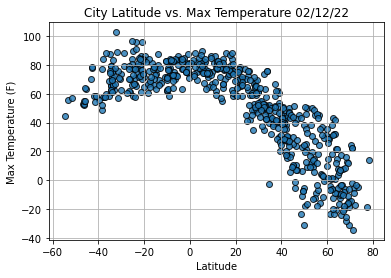

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

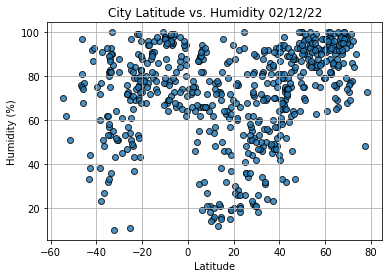

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

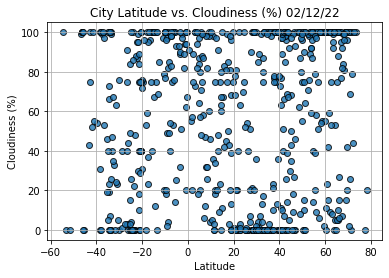

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

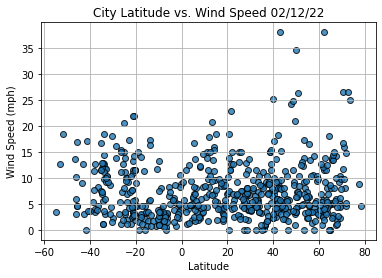

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2022-02-13 04:43:52
Lat                       42.6001
Lng                      -73.9662
Max Temp                    30.15
Humidity                       69
Cloudiness                     98
Wind Speed                   8.41
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
592    False
593     True
594    False
595     True
596     True
Name: Lat, Length: 597, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Cabo San Lucas,MX,2022-02-13 04:41:52,22.8909,-109.9124,70.52,66,63,5.75
3,Campbell River,CA,2022-02-13 04:44:43,50.0163,-125.2446,38.44,100,75,3.44
4,Hami,CN,2022-02-13 04:44:43,42.8000,93.4500,30.13,52,96,4.03
5,Butaritari,KI,2022-02-13 04:44:44,3.0707,172.7902,82.36,75,100,12.57
6,Chokurdakh,RU,2022-02-13 04:44:44,70.6333,147.9167,-1.91,94,100,11.68


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

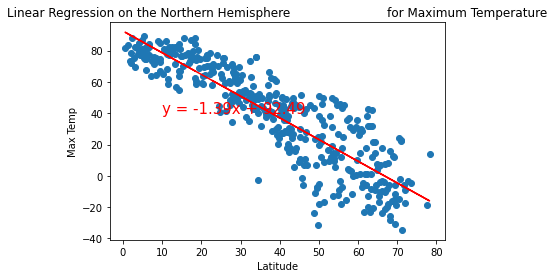

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

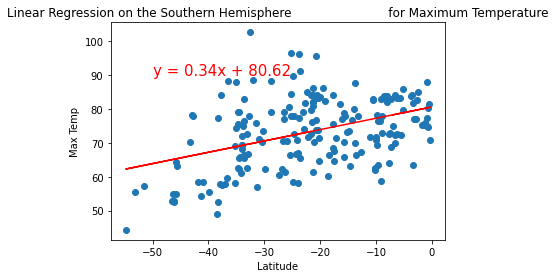

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

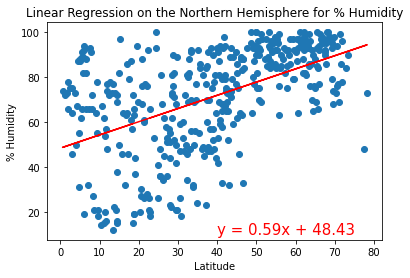

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

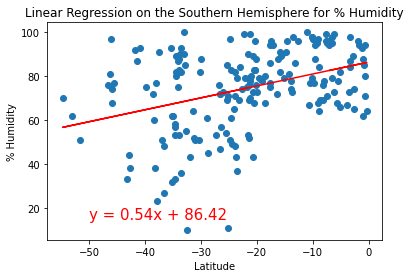

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

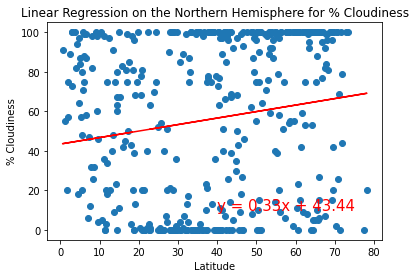

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

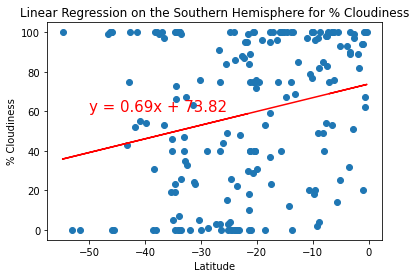

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

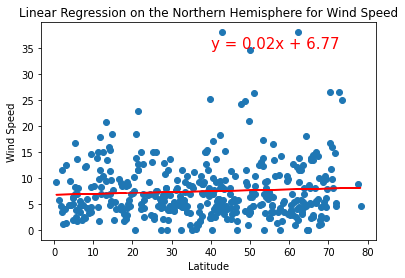

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


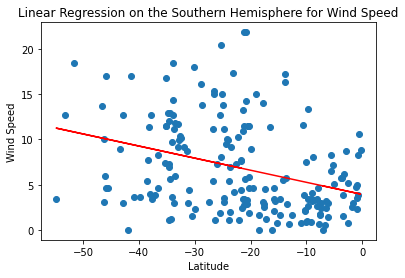

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))